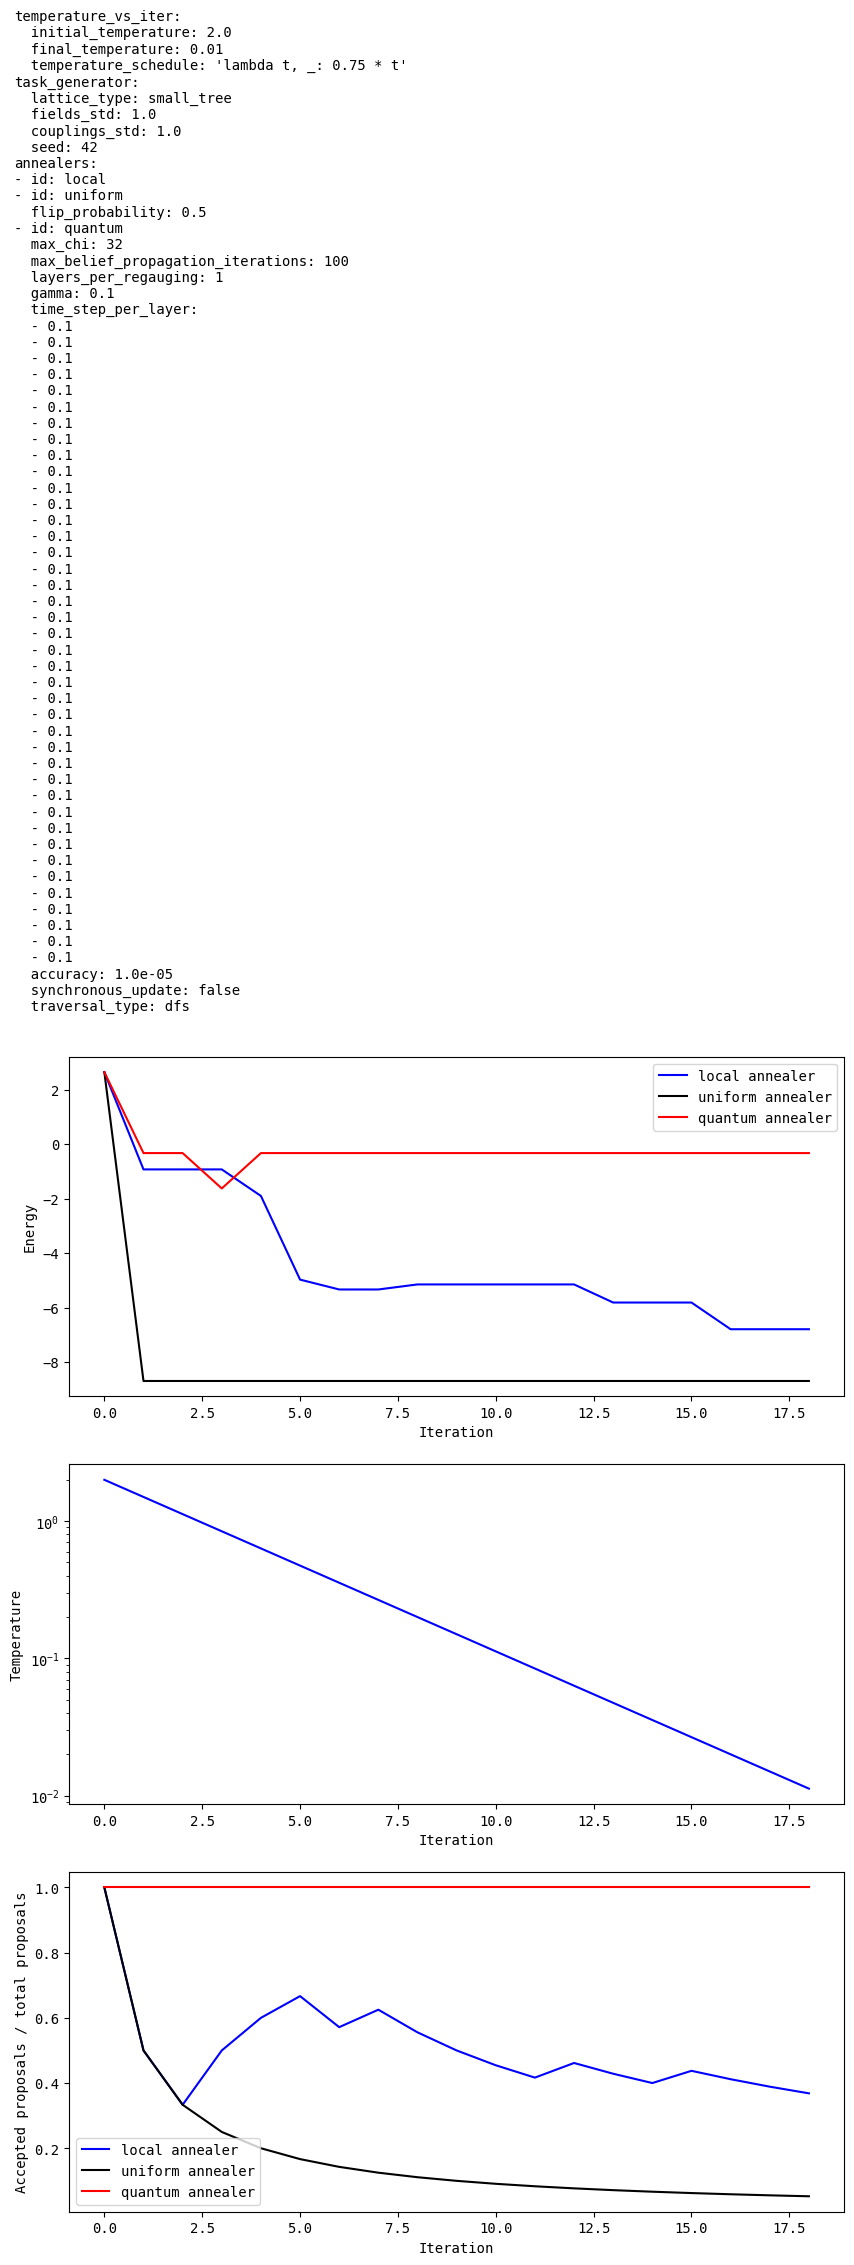

In [4]:
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams["font.family"] = "monospace"

# numerical experiment timestamp
timestamp = "2024-03-07/09-05-00"


dirpath = f"{os.getcwd()}/outputs/{timestamp}"
config_path = f"{dirpath}/.hydra/config.yaml"
with open(config_path, 'r') as config_file:
    config = config_file.read()

try:
    local_annealer_data = h5py.File(f"{dirpath}/local_annealer_result")
except:
    print("Data for LOCAL annealer is not present.")
    local_annealer_data = None
try:
    uniform_annealer_data = h5py.File(f"{dirpath}/uniform_annealer_result")
except:
    print("Data for UNIFORM annealer is not present.")
    uniform_annealer_data = None
try:
    quantum_annealer_data = h5py.File(f"{dirpath}/quantum_annealer_result")
except:
    print("Data for QUANTUM annealer is not present.")
    quantum_annealer_data = None

fig = plt.figure(figsize=(10, 15))
fig.text(0.07, 0.9, config)
ax = fig.add_subplot(311)
ax.set_ylabel("Energy")
ax.set_xlabel("Iteration")
if local_annealer_data is not None:
    ax.plot(local_annealer_data["energy_vs_iteration"].__array__(), "b", label="local annealer")
if uniform_annealer_data is not None:
    ax.plot(uniform_annealer_data["energy_vs_iteration"].__array__(), "k", label="uniform annealer")
if quantum_annealer_data is not None:
    ax.plot(quantum_annealer_data["energy_vs_iteration"].__array__(), "r", label="quantum annealer")
ax.legend()
ax = fig.add_subplot(312)
ax.set_ylabel("Temperature")
ax.set_xlabel("Iteration")
ax.set_yscale("log")
ax.plot((local_annealer_data or uniform_annealer_data or quantum_annealer_data)["temperature_vs_iteration"].__array__(), "b")
ax = fig.add_subplot(313)
ax.set_ylabel("Accepted proposals / total proposals")
ax.set_xlabel("Iteration")
if local_annealer_data is not None:
    acceptance_vs_iteration = local_annealer_data["acceptance_vs_iteration"].__array__()
    ratio = np.cumsum(acceptance_vs_iteration) / np.arange(1, acceptance_vs_iteration.shape[0] + 1)
    ax.plot(ratio, "b", label="local annealer")
if uniform_annealer_data is not None:
    acceptance_vs_iteration = uniform_annealer_data["acceptance_vs_iteration"].__array__()
    ratio = np.cumsum(acceptance_vs_iteration) / np.arange(1, acceptance_vs_iteration.shape[0] + 1)
    ax.plot(ratio, "k", label="uniform annealer")
if quantum_annealer_data is not None:
    acceptance_vs_iteration = quantum_annealer_data["acceptance_vs_iteration"].__array__()
    ratio = np.cumsum(acceptance_vs_iteration) / np.arange(1, acceptance_vs_iteration.shape[0] + 1)
    ax.plot(ratio, "r", label="quantum annealer")
ax.legend()